# 2021-09-16 Updating to latest oBEo and oBEv formulation

Results below are for commit: 

(Rerunning the code below for other commits is not guaranteed to give the same results.)

I have now:
* Completely updated to the formulations in the 2021-09-10 notes: Removed $\lambda$, renamed $T_\mathrm{O}$ to $T_\mathrm{Of}$, introduced $T_\mathrm{O1}$. I am holding off on defining $\beta_\mathrm{V}$ as a derived parameter from $P_\dagger$ though, because of the insights made at the end of the earlier notes from today.
* Changed to a new set of default parameters for the `oBEo` and `oBEv` stuff - see further below.

## Init

In [1]:
# append root folder of repo to PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))
print(sys.path[-1])

# imports needed to run the simulations
import numpy as np
import commotions
import sc_scenario
from sc_scenario import get_default_params, get_assumptions_dict, SCSimulation
from sc_scenario_helper import CtrlType

C:\GITHUB\COMMOTIONSFramework


C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:89: UserWarning: N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.
  warnings.warn('N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.')


## Unit tests, reproducing earlier results

Just the base model, no interaction. 

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:202: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


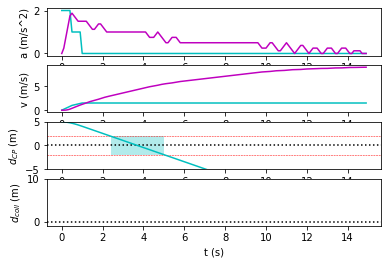

In [3]:
NAMES = ('P', 'V')
CTRL_TYPES = (CtrlType.SPEED, CtrlType.ACCELERATION) 
INITIAL_POSITIONS = np.array([[0,-5], [400, 0]])
GOALS = np.array([[0, 5], [-50, 0]])
SPEEDS = np.array((0, 0))

optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = True, oBEo = False, oBEv = False, oAI = False, oEA = False)
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = NAMES)
sc_simulation.run()
sc_simulation.do_plots(kinem_states = True)

Baseline kinematics, base model. Quite unexpectedly for me, this still yields the same output as before adding the value squashing... But when I think further about it I shouldn't be so surprised, because the value squashing doesn't change the order of values for different actions, which is all that matters for the base model.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:202: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 30 m:


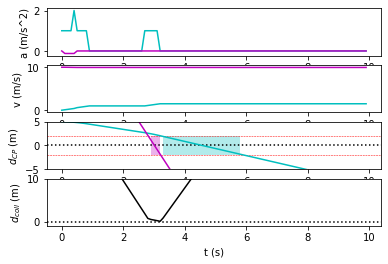

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:202: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


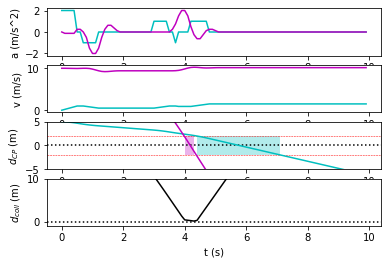

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:202: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 50 m:


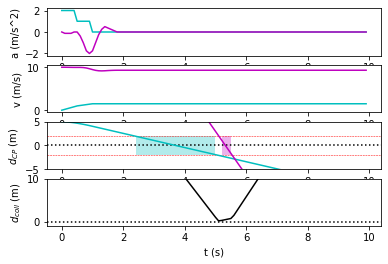

In [4]:
SPEEDS = np.array((0, 10))
PED_Y0 = -5
CONST_ACCS = (None, None)
AFF_VAL_FCN = True
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = False, oBEv = False, oAI = False, oEA = False)
(params, params_k) = sc_scenario.get_default_params(oVA = AFF_VAL_FCN)


def run_baseline_kinematics(dist0s = (30, 40, 50), plot_beh_probs = False, 
                            plot_beh_activs = False, plot_beh_accs = False,
                            ped_snaps = None, veh_snaps = None):
    for dist0 in dist0s:
        INITIAL_POSITIONS = np.array([[0, PED_Y0], [dist0, 0]])
        sc_simulation = SCSimulation(
                CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
                end_time = 10, optional_assumptions = optional_assumptions,
                agent_names = NAMES, const_accs = CONST_ACCS, params = params,
                snapshot_times = (ped_snaps, veh_snaps))
        sc_simulation.run()
        print('Initial car distance %d m:' % dist0)
        sc_simulation.do_plots(kinem_states = True, beh_probs = plot_beh_probs,
                              beh_activs = plot_beh_activs, beh_accs = plot_beh_accs)

run_baseline_kinematics()

## Verifying that I get back the same `oBEo` + `oBEv` + `oAI` sequence as before

Just verifying that I get the same stuff back as in the simulations earlier today, when I set parameters that should get me those same results - and yes that works:

Turning on oBEo:


C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:202: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


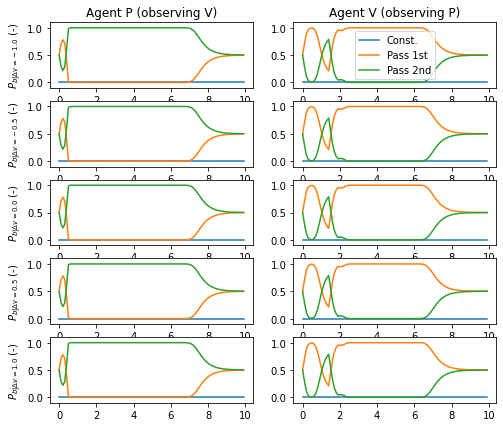

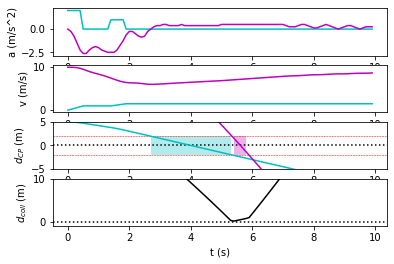

Turning on oBEv:


C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:202: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


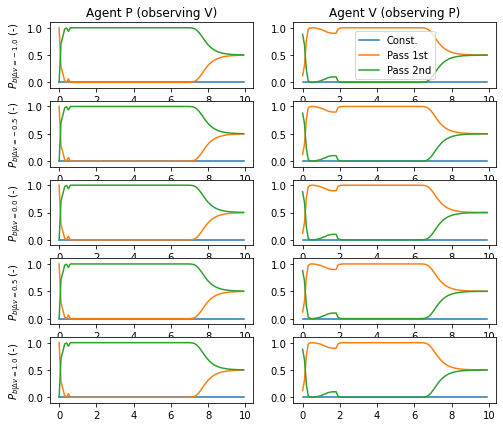

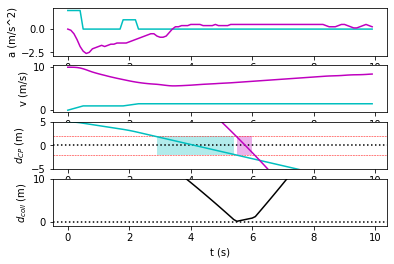

Turning on oAI:


C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:202: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


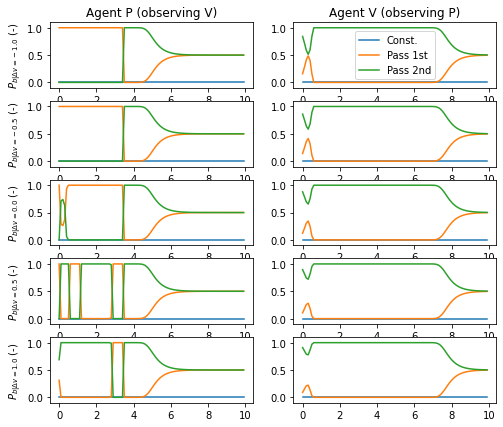

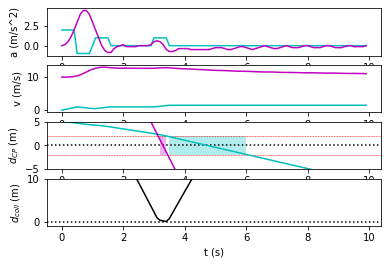

In [8]:

params.T_O1 = 0.1 # was previously implicitly equal to the simulation time step
params.T_Of = 0.5
params.sigma_O = 0.01
params.beta_V = 160

print('Turning on oBEo:')
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)
print('Turning on oBEv:')
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True, oBEv = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)
print('Turning on oAI:')
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True, oBEv = True, oAI = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

## New default parameters

After playing around a little with the parameters, I've opted for the following default parameters for the `oBEo` and `oBEv` stuff, which seem sort of sensible, and give sort of nice-looking results:
* $T_\mathrm{O1} = 0.05$ s, "sampling" new Bayesian observations at 20 Hz.
* $T_\mathrm{Of} - 0.5$ s, forgetting old observation information with a half second decay time constant.
* $\sigma_\mathrm{O} = 0.1$ m, a decimeter uncertainty when observing position to deduce behaviour. With this and the two parameters above, I like how the belief develops in the pure `oBEo` simulation below.
* $\beta_\mathrm{V} = 60$, which is the smallest value I can set it to and still get the assertive behaviour from the car when turning on `oAI` below. A quite arbitrary choice of course, and I think that it maybe is too high (has `oBEv` unduly swamp `oBEo`), but let's go with that for now.

Here is the same three-simulation sequence as before, now with these new default parameters instead:

Turning on oBEo:


C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:202: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


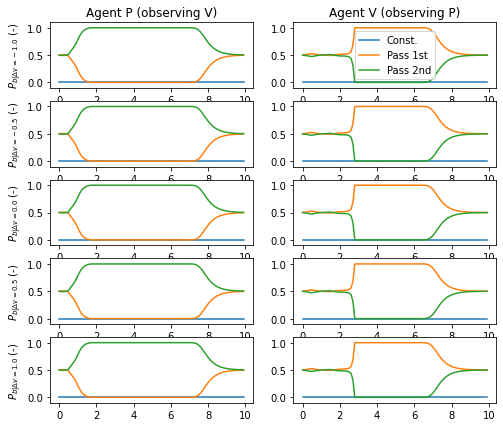

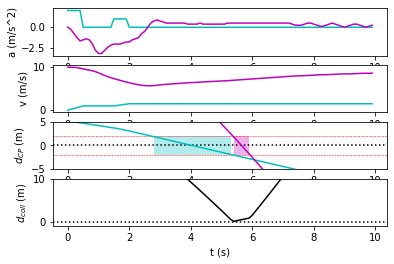

Turning on oBEv:


C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:202: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


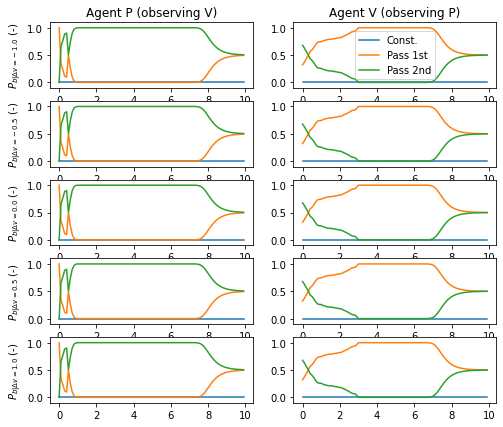

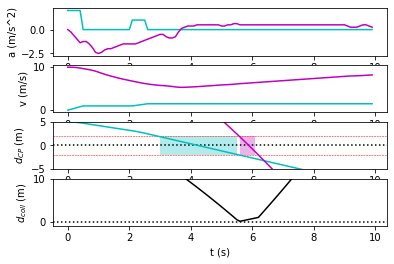

Turning on oAI:


C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:202: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


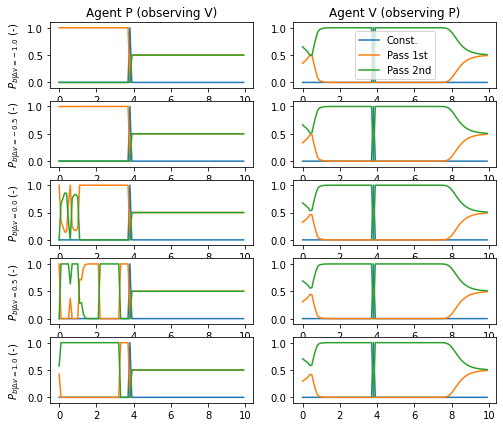

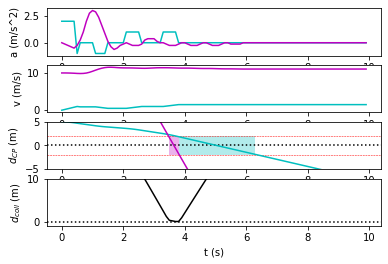

In [10]:
(params, params_k) = sc_scenario.get_default_params(oVA = AFF_VAL_FCN)

print('Turning on oBEo:')
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)
print('Turning on oBEv:')
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True, oBEv = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)
print('Turning on oAI:')
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True, oBEv = True, oAI = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

## A note about "decelerating to resolve uncertainty"

While playing around with the parameters I also noticed that if the agents become highly uncertain about the behaviour of the other agent (in the simulation below because all behaviours look equally improbable due to a very low $\sigma_\mathrm{O}$, the do seem to be exhibiting something like "decelerating to resolve uncertainty". Just a good thing to note and remember...

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:202: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


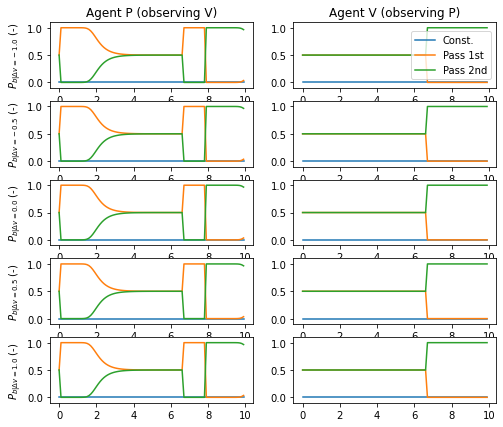

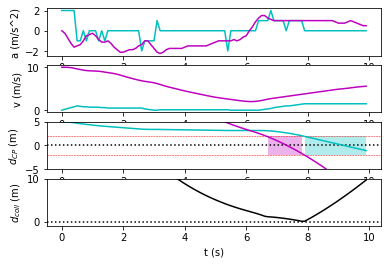

In [11]:
params.sigma_O = 0.000001
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True)
run_baseline_kinematics(dist0s = (40,), plot_beh_probs = True)

## Summary

All in all I am not 100% convinced the `oBEo` and `oBEv` is perfect yet, especially not together with the `oAI` stuff (as noted above, I need to crank up $\beta_\mathrm{V}$ very high to get behaviour-affecting actions, which in turn drowns out the action observation). But I think it's good enough to move on for now, test other parameterisations more exhaustively etc.

I basically think it's time now to implement the wider simulation and parameterisation-testing framework. I still haven't implemented `oPN`, but not sure I need to do that first since that might open up a can of worms of its own...